# Тазенков Иван Дмитриевич, ИУ5-65Б <br />Вариант №11: номер задачи - 2; номер набора данных - 3.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams # для того, чтобы задавать размер диаграмм
%matplotlib inline

In [2]:
data = pd.read_csv('/kaggle/input/fivethirtyeight-comic-characters-dataset/marvel-wikia-data.csv', sep=',')

In [3]:
data.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


In [4]:
data.isnull().sum()

page_id                 0
name                    0
urlslug                 0
ID                   3770
ALIGN                2812
EYE                  9767
HAIR                 4264
SEX                   854
GSM                 16286
ALIVE                   3
APPEARANCES          1096
FIRST APPEARANCE      815
Year                  815
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16376 entries, 0 to 16375
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   page_id           16376 non-null  int64  
 1   name              16376 non-null  object 
 2   urlslug           16376 non-null  object 
 3   ID                12606 non-null  object 
 4   ALIGN             13564 non-null  object 
 5   EYE               6609 non-null   object 
 6   HAIR              12112 non-null  object 
 7   SEX               15522 non-null  object 
 8   GSM               90 non-null     object 
 9   ALIVE             16373 non-null  object 
 10  APPEARANCES       15280 non-null  float64
 11  FIRST APPEARANCE  15561 non-null  object 
 12  Year              15561 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 1.6+ MB


In [6]:
mising_count = data.isnull().sum()
all_count = data.isnull().count()
pd.concat([mising_count.sort_values(), (mising_count/all_count*100).sort_values()], 
          axis=1, keys=['Количество пропусков', 'Процент пропусков']).tail(11)

,Количество пропусков,Процент пропусков
urlslug,0,0.000000
ALIVE,3,0.018319
FIRST APPEARANCE,815,4.976795
Year,815,4.976795
SEX,854,5.214949
APPEARANCES,1096,6.692721
ALIGN,2812,17.171470
ID,3770,23.021495
HAIR,4264,26.038105
EYE,9767,59.642159


## Обработка пропусков для категориального признака "GSM"

 Выполним удаление данного признака так как отстутствуют 99% данных

In [7]:
data.drop(['GSM'], axis=1, inplace=True)

## Обработка пропусков для "APPEARANCES"

Заполненим этот признак так как пропуски незначительные (всего 6%)

<AxesSubplot: xlabel='APPEARANCES', ylabel='Year'>

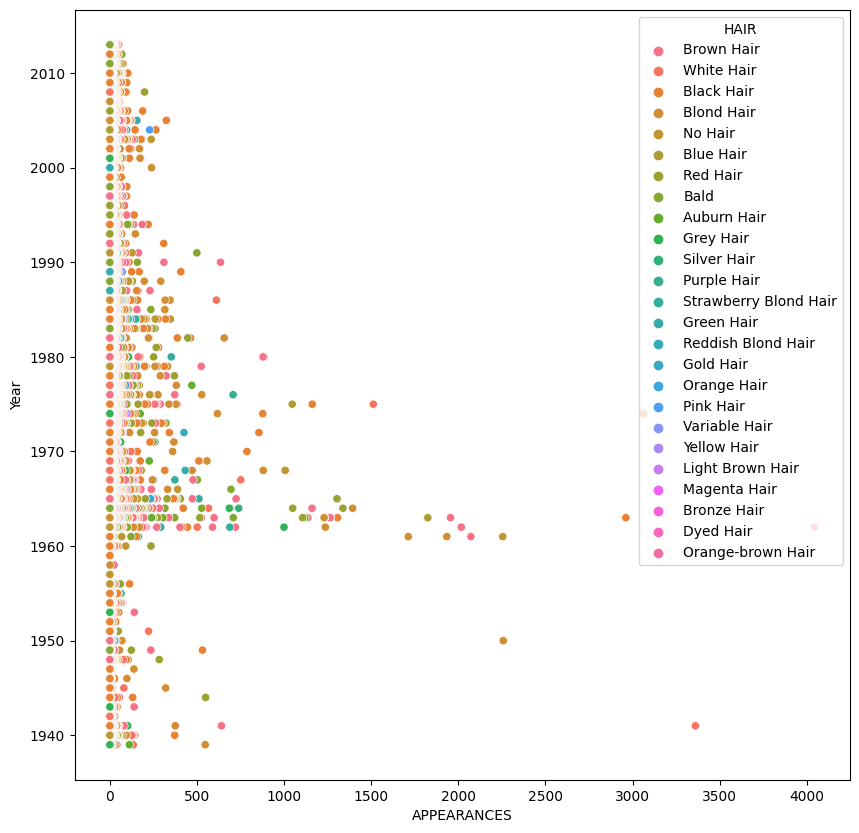

In [8]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(ax=ax, x = "APPEARANCES",y = "Year", data=data, hue='HAIR')

Для заполнения будем использовать моду "Наиболее вероятный":

In [9]:
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data[['APPEARANCES']])
imp_num = SimpleImputer(strategy='most_frequent')
data_num_imp = imp_num.fit_transform(data[['APPEARANCES']])
data['APPEARANCES'] = data_num_imp
filled_data = data_num_imp[mask_missing_values_only]
print('APPEARANCES', 'most_frequent', filled_data.size, filled_data[0], filled_data[filled_data.size-1], sep='; ')

APPEARANCES; most_frequent; 1096; 1.0; 1.0


Еще один графичек чтобы был)))

<AxesSubplot: xlabel='SEX', ylabel='Year'>

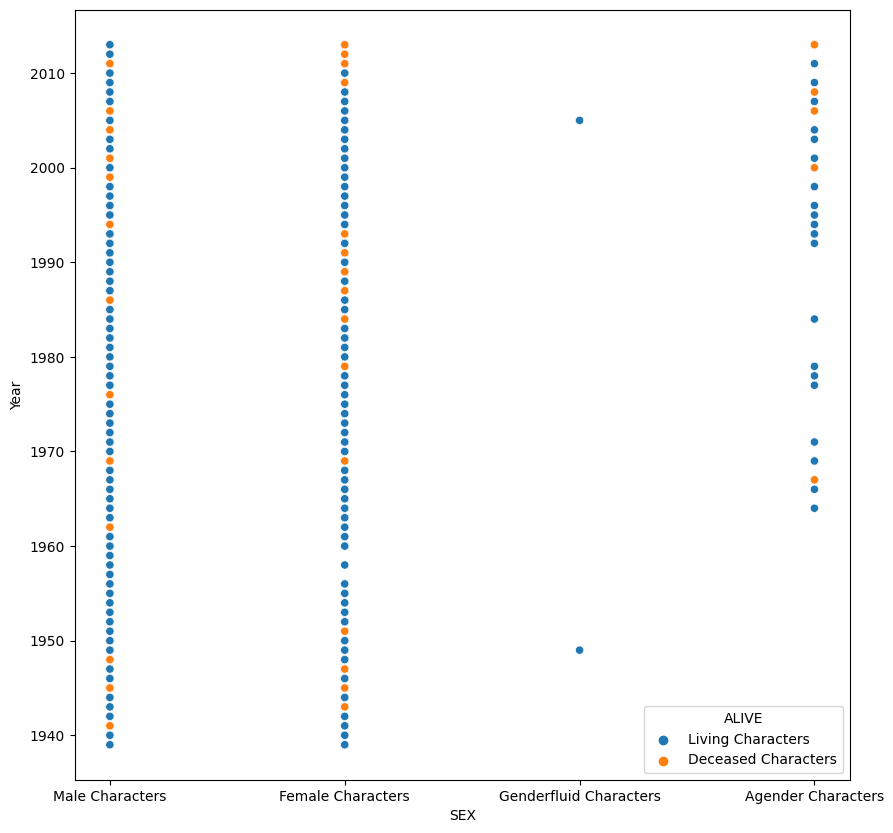

In [10]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(ax=ax, x = "SEX",y = "Year", data=data, hue='ALIVE')

## Итоговый вид датасета после обработки пропусков в двух признаках

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16376 entries, 0 to 16375
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   page_id           16376 non-null  int64  
 1   name              16376 non-null  object 
 2   urlslug           16376 non-null  object 
 3   ID                12606 non-null  object 
 4   ALIGN             13564 non-null  object 
 5   EYE               6609 non-null   object 
 6   HAIR              12112 non-null  object 
 7   SEX               15522 non-null  object 
 8   ALIVE             16373 non-null  object 
 9   APPEARANCES       16376 non-null  float64
 10  FIRST APPEARANCE  15561 non-null  object 
 11  Year              15561 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 1.5+ MB


# Парная диаграмма

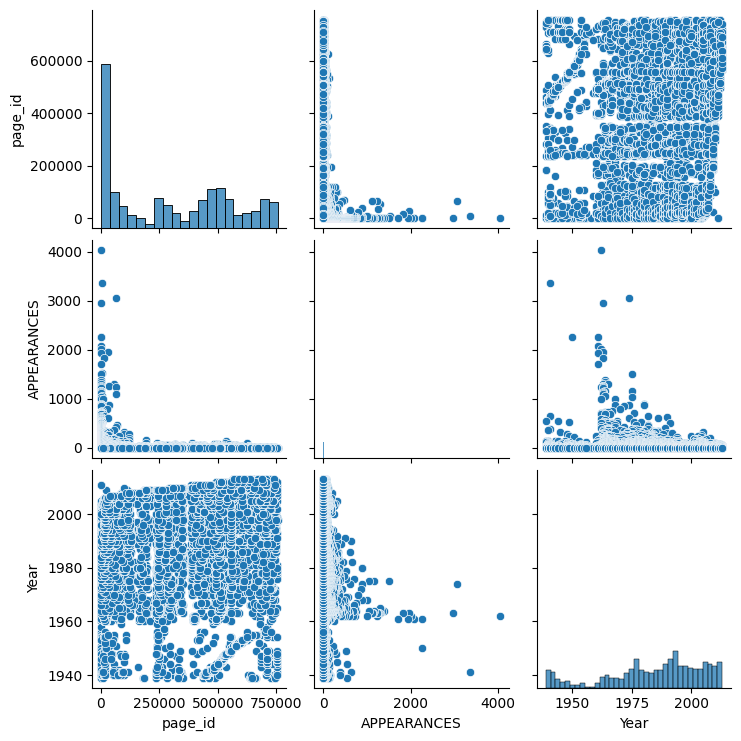

In [16]:
sns.pairplot(data)